# Основные статистические тесты и проверка гипотез.

In [18]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics

# Датасет людей с болезнями сердца

Датасет для предсказания болезни человека (сердечная болезнь) - https://www.kaggle.com/ronitf/heart-disease-uci.

Колонки:

* age
* sex
* cp chest pain type (4 values)
* trestbps resting blood pressure
* chol serum cholestoral in mg/dl
* fbs fasting blood sugar > 120 mg/dl
* restecg resting electrocardiographic results (values 0,1,2)
* thalach maximum heart rate achieved
* exang exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest. A test that indicates a high probability of coronary artery disease is one in which there is substantial ST depression at low work rate associated with typical angina-like pain and a drop in blood pressure. Deeper and more widespread ST depression generally indicates more severe or extensive disease.
* the slope of the peak exercise ST segment
* ca number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - ill or not => target == 0 means that there is significant heart disease. A 1 means that there is not.

In [19]:
data=pd.read_csv('datasets_33180_43520_heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Генеральная совокупность** в данном случае - все пациенты. Их количество - 303, максимальный возраст - 77:

In [21]:
len(data)

303

In [23]:
max(data['age'])

77

Точечный график двух параметров:

**trestbps** - давление в спокойном состоянии

**chol** - уровень холестерина

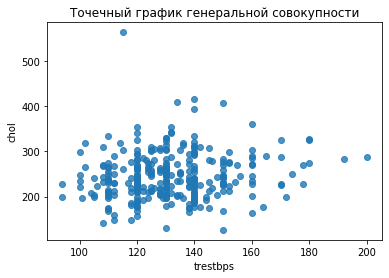

In [24]:
trestbps = data['trestbps']
chol = data['chol']
sns.regplot(x= trestbps, y=chol,data=data, fit_reg=False)
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.title('Точечный график генеральной совокупности')
plt.show()

**Выборка №1**

Возьмем выборку из генеральной совокупности - люди, возраст которых меньше 45 лет.
Строим точечный график.


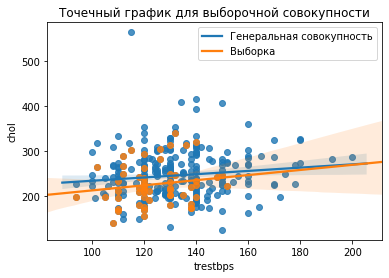

In [75]:
trestbps_small = data[data['age']<45]['trestbps']
chol_small = data[data['age']<45]['chol']
sns.regplot(x= trestbps, y=chol,data=data, fit_reg=True)
sns.regplot(x= trestbps_small, y=chol_small,data=data, fit_reg=True)
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.legend(['Генеральная совокупность', 'Выборка'])
plt.title('Точечный график для выборочной совокупности')
plt.show()

In [50]:
len(data[data['age']<45])

56

По графику можно заметить, что в данной выборке статистические формулы о генеральной совокупности будут верны, так как выборка более-менее презентативна.


**Выборка №2**

Возьмем выборку людей, возраст которых меньше 40 лет. Посмотрим точечный график двух параметров: **thalach** - максимальный пульс и **trestbps** - показатель давления в спокойном положении. По графику можно сделать вывод, что эти параметры имеют линейную зависимость.

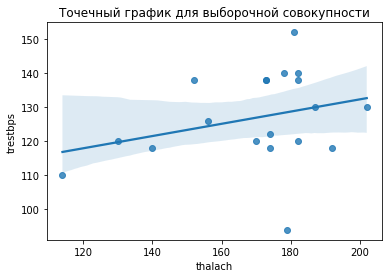

In [25]:
thalach_small = data[data['age']<=40]['thalach']
trestbps_small = data[data['age']<=40]['trestbps']
sns.regplot(x= thalach_small, y=trestbps_small,data=data, fit_reg=True)
plt.xlabel('thalach')
plt.ylabel('trestbps')
plt.title('Точечный график для выборочной совокупности')
plt.show()

В генеральной совокупности можно увидеть, что этой зависимости нет.

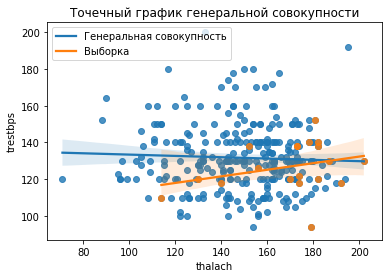

In [26]:
thalach = data['thalach']
trestbps = data['trestbps']
sns.regplot(x= thalach, y=trestbps,data=data, fit_reg=True)
sns.regplot(x= thalach_small, y=trestbps_small,data=data, fit_reg=True)
plt.xlabel('thalach')
plt.ylabel('trestbps')
plt.legend(['Генеральная совокупность', 'Выборка'])
plt.title('Точечный график генеральной совокупности')
plt.show()

Данная выборка является непрезентативной.

# Доверительный интервал

Посчитаем доверительный интервал для параметра trestbps и chol.

Среднее значение:

In [27]:
mean_val = statistics.mean(trestbps)
print(mean_val)

131.62376237623764


Стандартное отклонение:

In [28]:
st_deviation = statistics.pstdev(trestbps)
print(st_deviation)

17.509178065734393


Частотный график выборки:

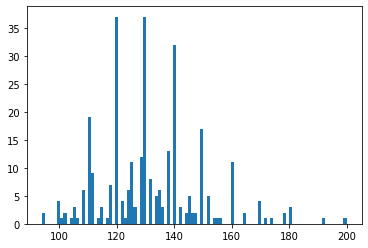

In [29]:
plt.hist(trestbps, 100)
plt.show()

Процент элементов, лежащих в пределах доверительного интервала:

In [30]:
len(trestbps[(trestbps>=mean_val-2*st_deviation) & (trestbps<=mean_val + 2*st_deviation)])/len(trestbps)

0.9504950495049505

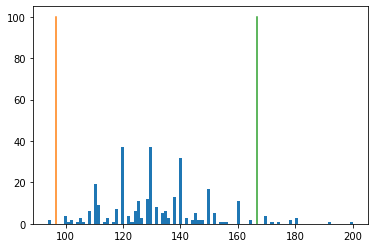

In [31]:
plt.hist(trestbps, 100)
plt.plot([mean_val-2*st_deviation, mean_val-2*st_deviation], [0, 100])
plt.plot([mean_val+2*st_deviation, mean_val+2*st_deviation], [0, 100])

**95% выборки находится в пределах доверительного интервала.**

# Квантили

10-типроцентный квантиль для всех атрибутов:

In [36]:
data.quantile(.1)

age          42.0
sex           0.0
cp            0.0
trestbps    110.0
chol        188.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        0.0
Name: 0.1, dtype: float64

30-типроцентный квантиль для атрибута trestbps:

In [37]:
quantille_30 = trestbps.quantile(.3)
print(quantille_30)

120.0


Убеждаемся, что 120 - это 30типроцентный квантиль:

In [38]:
len(trestbps[trestbps<=quantille_30])/len(trestbps)

0.3201320132013201

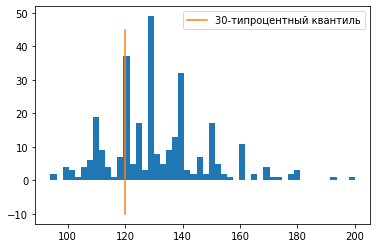

In [39]:
plt.hist(trestbps, 50)
plt.plot([120, 120], [-10, 45])
plt.legend(['30-типроцентный квантиль'])
plt.show()

# Квартили

In [40]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


25%, 50%, 75% - соответствующие квартили (1ый, второй, третий).

**Корреляционные тесты**

Коэффициент корреляции Пирсона

H0: два образца независимы
H1: существует зависимость между образцами.

In [70]:
from scipy.stats import pearsonr
r, p = pearsonr(trestbps, chol)
print(r, p)
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

0.12317420653239074 0.032082053610872296
Probably dependent


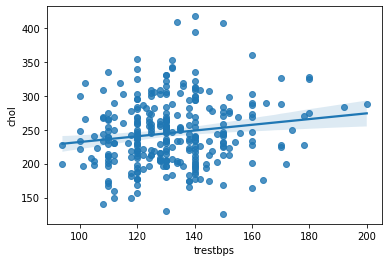

In [71]:
sns.regplot(x= data.loc[data['chol']<500, 'trestbps'], y=data.loc[data['chol']<500, 'chol'],data=data, fit_reg=True)
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.show()

# Ранговая корреляция Спирмена

Имеют ли два образца монотонные отношения.

*  H0: два образца независимы
*  H1: существует зависимость между образцами.

In [72]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr

stat, p = spearmanr(data['chol'], data['thalach'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.047, p=0.417
Probably independent


# Ранговая корреляция Кендалла

Уровень холестерин имеет зависимость с уровнем давления в состоянии покоя

In [73]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
stat, p = kendalltau(data['trestbps'], data['chol'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.086, p=0.029
Probably dependent


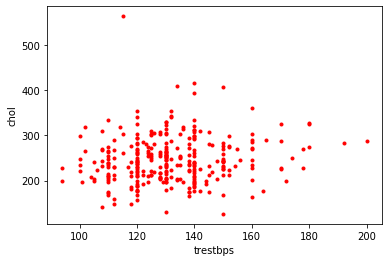

In [74]:
plt.plot(data['trestbps'], data['chol'], 'r.')
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.show()

# **AB - тестирование**

# Проверка гипотезы t-критерия Стьюдента

Сравниваем средние значения в двух выборках:

*  H0: выборочные средние значения равны
*  H1: выборочные средние не равны

С помощью теста измеряем, насколько среднеквадратичное значение меняется среди выборок, чтобы принять или отвергнуть нулевую гипотезу.

# Одновыборочный t-критерий

Посчитаем T-test, чтобы определить насколько среднее исследуемой выборки (женщины) статистически отличается от среднего значения генеральной совокупности.

Выборка женщин по параметру "trestbps" или уровень давления в состоянии спокойствия.

Н0: - среднее значение выборки равно среднему значению генеральной совокупности.

In [80]:
data['trestbps'].mean()

131.62376237623764

In [78]:
female_bps = data[data['sex']==0]['trestbps']
stats.ttest_1samp(female_bps, data['trestbps'].mean())

Ttest_1sampResult(statistic=0.7405483189915916, pvalue=0.4607937727598822)

In [81]:
print('Количество женщин всего: ', len(female_bps))

Количество женщин всего:  96


*T*-значение 0.71, мы оцениваем p-value.
Количество женщин в выборке = 96.

t-value = 0.7405483189915916, мы его сравниваем с табличным значением 2.00 (alpha = 0.05, N=95). Так как значение t-value не превышает 1.97, то мы принимаем нулевую гипотезу (о том, что средние значения выборок равны. 

Если мы оценим p-value, тогда получим высокую вероятность получить такое (либо большее) значение t при условии, что проверяемая нулевая гипотеза верна, p-value = 0.46

p-value равно 0.46, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между давлением женщин и генеральной совокупности в целом. 

Для наглядности строим график вероятности выборки и генеральной совокупности:

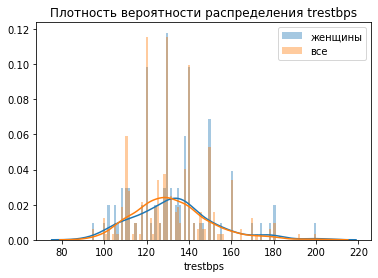

In [122]:
f_trestbps = data[data['sex']==0]['trestbps']
trestbps = data['trestbps']
sns.distplot(f_trestbps, 100)
sns.distplot(trestbps, 100)
plt.title('Плотность вероятности распределения trestbps')
plt.legend(['женщины', 'все'])
plt.show()

# Двухвыборочный t-критерий для независимых выборок

Сравним давление женщин и мужчин с помощью t-значения. Чем выше будет t, тем более различны будут группы между собой:

In [83]:
female_bps = data[data['sex']==0]['trestbps']

male_bps = data[data['sex']==1]['trestbps']

print(stats.ttest_ind(female_bps, male_bps))

Ttest_indResult(statistic=0.9864931536208362, pvalue=0.3246834797221042)


p-value равно 0.32, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что статистического различия между давлением женщин и мужчин в целом нет.

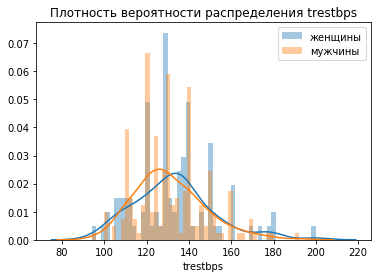

In [84]:
sns.distplot(female_bps, 50)
sns.distplot(male_bps, 50)
plt.title('Плотность вероятности распределения trestbps')
plt.legend(['женщины', 'мужчины'])
plt.show()

Сравним показатели давления больных и здоровых людей

In [85]:
healthy_bps = data[data['target']==0]['trestbps']

ill_bps = data[data['target']==1]['trestbps']

stats.ttest_ind(healthy_bps, ill_bps)

Ttest_indResult(statistic=2.5412927171039, pvalue=0.011546059200233312)

t-value равно 2,5 и p-value меньше 0.01, значит, группы статистически отличаются

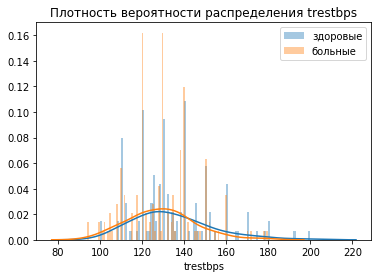

In [86]:
sns.distplot(healthy_bps, 100)
sns.distplot(ill_bps, 100)
plt.title('Плотность вероятности распределения trestbps')
plt.legend(['здоровые', 'больные'])
plt.show()

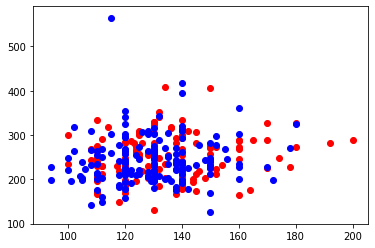

In [87]:
plt.scatter(healthy_bps, data[data['target']==0]['chol'], color='r')
plt.scatter(ill_bps, data[data['target']==1]['chol'], color='b')

In [88]:
print(len(healthy_bps))
print(len(ill_bps))

138
165


Сравним две группы людей (больных и здоровых) по показателям **oldpeak** (тест, который указывает на высокую вероятность заболевания коронарной артерии, - это тест, в котором наблюдается значительная депрессия ST при низкой частоте работы, связанная с типичной стенообразной болью и снижением артериального давления). Так как здоровые показатели очевидно отличаются от больных, посмотрим статистические показатели.

In [89]:
healthy_oldpeak = data[data['target']==0]['oldpeak']

ill_oldpeak = data[data['target']==1]['oldpeak']

stats.ttest_ind(healthy_oldpeak, ill_oldpeak)

Ttest_indResult(statistic=8.279579663866224, pvalue=4.085346391354538e-15)

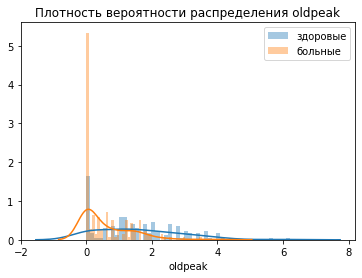

In [90]:
sns.distplot(healthy_oldpeak, 50)
sns.distplot(ill_oldpeak, 50)
plt.title('Плотность вероятности распределения oldpeak')
plt.legend(['здоровые', 'больные'])
plt.show()

Высокий показатель t-value=8.2 и низкий показатель p-value=0 говорит о том, что группы статистически значимы.

# Множественный тест (ANOVA)

Возьмем таблицу 3 группы из колонки restecg (resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)). Сравним их на наличие болезней

In [91]:
restecg_0 = data[data['restecg']==0]['target']

restecg_1 = data[data['restecg']==1]['target']

restecg_2 = data[data['restecg']==2]['target']

stats.f_oneway(restecg_0, restecg_1, restecg_2)

F_onewayResult(statistic=5.131680093569876, pvalue=0.0064359766834508085)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп с разным типом показателей ЭКГ.